In [1]:
import matplotlib.pyplot as plt

from series2graph import *

In [2]:
import pandas as pd

df = pd.read_csv("../DATA/33761.ts",header=None)[:100000]

print("Time Series Statistics:")
print("Number of points: {}".format(len(df)))

Time Series Statistics:
Number of points: 2784


In [3]:
pattern_length = 75
query_length = 100

In [4]:
s2g = Series2Graph(pattern_length=pattern_length)
s2g.fit(df)

Text(0.5, 1.0, 'SProj(T,l,lambda)')

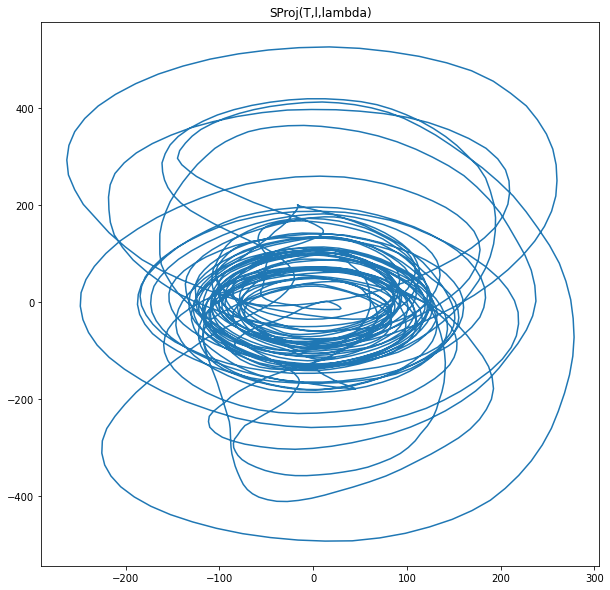

In [26]:
plt.figure(figsize=(10,10))
plt.plot(s2g.graph['proj_A']['0'],s2g.graph['proj_A']['1'])
plt.title("SProj(T,l,lambda)")

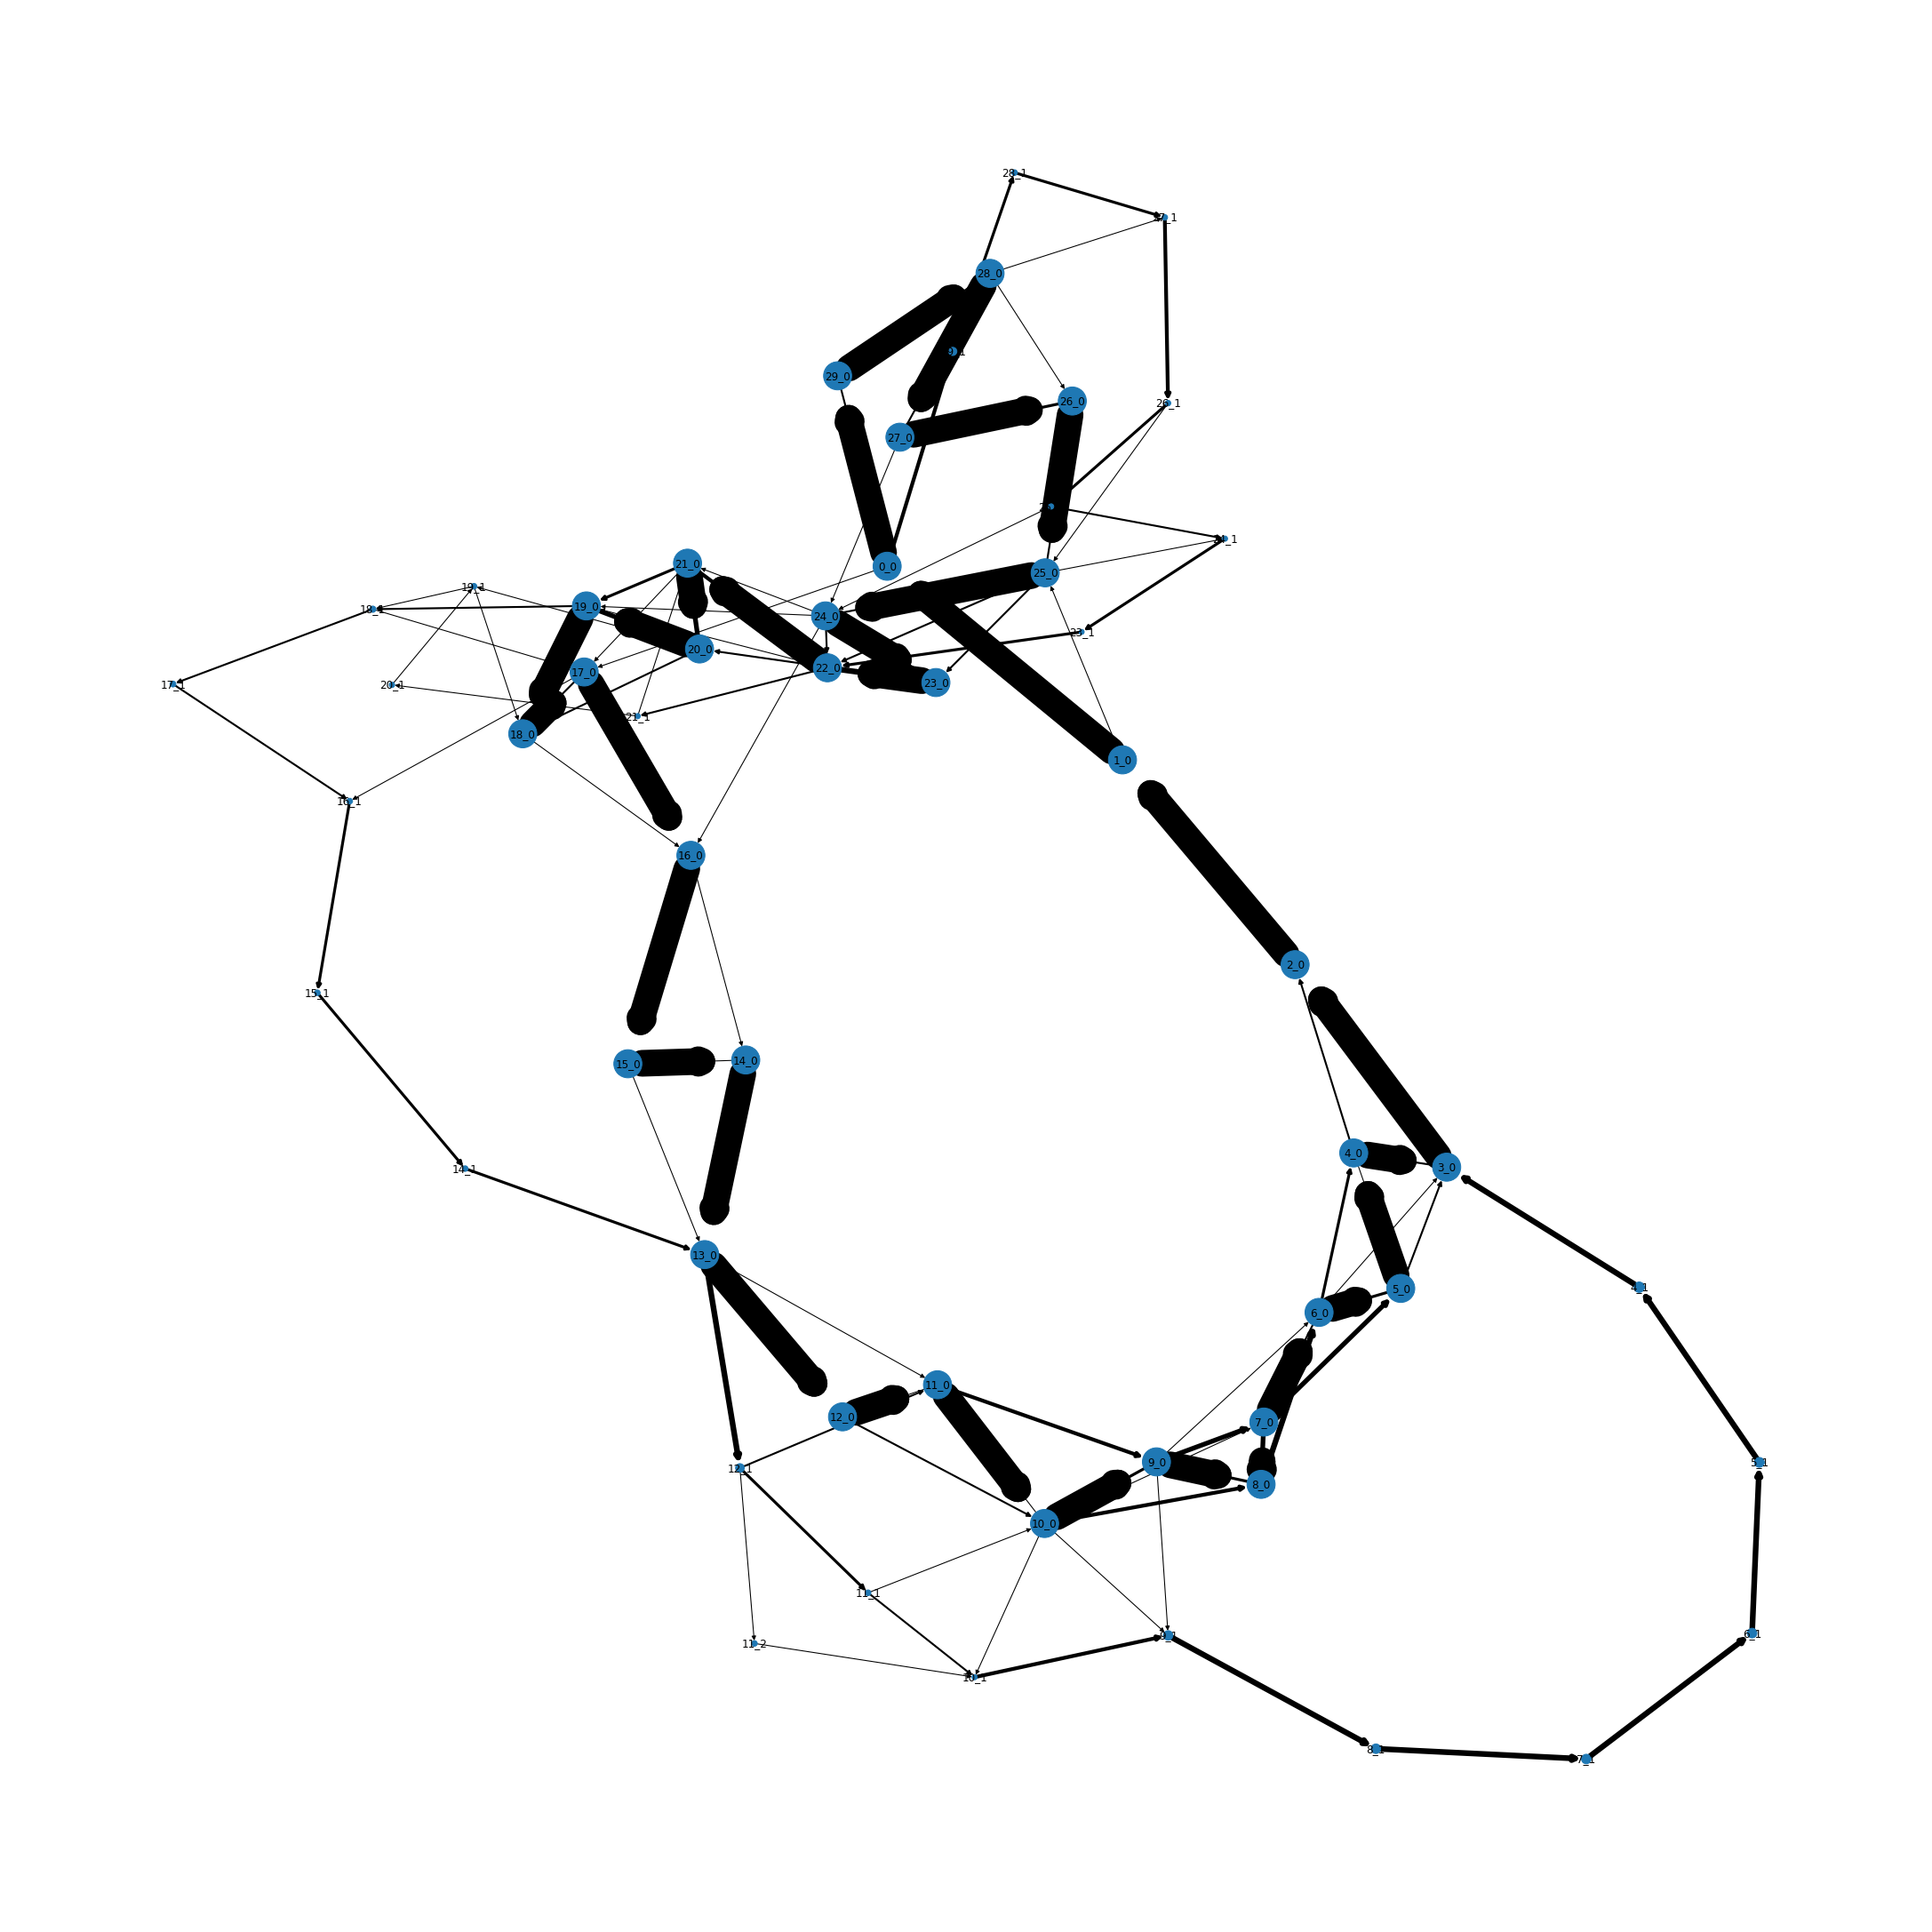

In [27]:
s2g.plot_graph()

In [28]:
s2g.score(query_length)

(0.0, 2582.0)

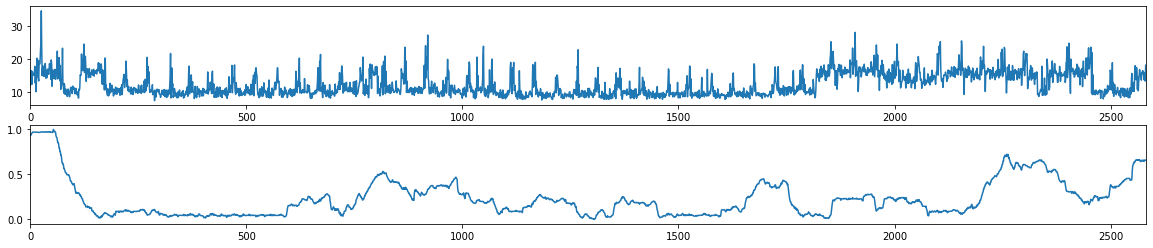

In [29]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(0,len(s2g.all_score))
ax[1].set_xlim(0,len(s2g.all_score))

(22500.0, 30000.0)

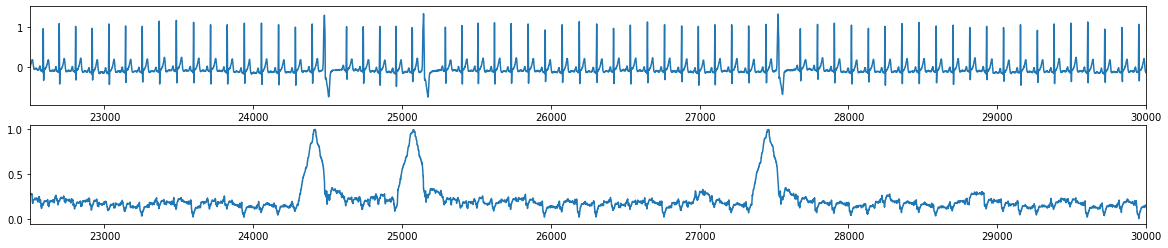

In [16]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(22500,30000)
ax[1].set_xlim(22500,30000)